In [1]:
import tensorflow as tf

In [2]:
import tensorflow.keras.datasets as data

In [3]:
d=data.fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [4]:
(xtrain,ytrain),(xtest,ytest)=d

In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
import IPython.display as ipd

In [7]:
xtrain[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
import matplotlib.pyplot as plt

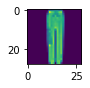

In [9]:
plt.figure(figsize=(1,1))
plt.imshow(xtrain[1000,:,:])

In [10]:
ytrain

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
import pandas as pd

In [12]:
labl = '''0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle-boot'''.split('\n')
labels = {i.split()[0]:i.split()[-1] for i in labl}
labels

{'0': 'T-shirt/top',
 '1': 'Trouser',
 '2': 'Pullover',
 '3': 'Dress',
 '4': 'Coat',
 '5': 'Sandal',
 '6': 'Shirt',
 '7': 'Sneaker',
 '8': 'Bag',
 '9': 'Ankle-boot'}

In [13]:
xtrain1 = xtrain.reshape(-1,784)
xtest1 = xtest.reshape(-1,784)

In [14]:
xtrain1.shape

(60000, 784)

In [15]:
xtest1.shape

(10000, 784)

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(activation='relu',input_shape=(784,),units=128))                    ## input layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))                                       ## hidden layer
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))                                ## output layer  Categorical data so softmax or sigmoid
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])        

In [17]:
history = model.fit(xtrain1,ytrain,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9283 - accuracy: 0.7361
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6385 - accuracy: 0.7908
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5542 - accuracy: 0.8122
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5030 - accuracy: 0.8269
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4572 - accuracy: 0.8383
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4227 - accuracy: 0.8507
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4106 - accuracy: 0.8521
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3950 - accuracy: 0.8594
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3828 - accuracy: 0.8621
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.376

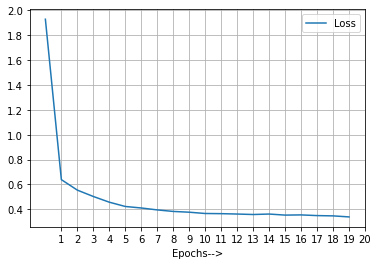

In [18]:
plt.plot(history.history['loss'])
plt.legend(['Loss'])
plt.grid()
plt.xticks(range(1,21))
plt.xlabel('Epochs-->')
plt.show()

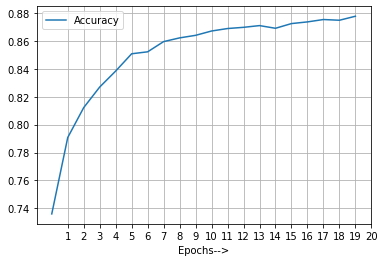

In [19]:
plt.plot(history.history['accuracy'])
plt.legend(['Accuracy'])
plt.grid()
plt.xticks(range(1,21))
plt.xlabel('Epochs-->')
plt.show()

In [20]:
ypred = model.predict(xtest1)

In [21]:
ypred[0]

array([1.3854755e-12, 9.2845343e-10, 4.8107769e-17, 8.5659688e-17,
       1.0208718e-10, 1.0727796e-02, 1.3884160e-10, 1.6325036e-02,
       5.2521478e-05, 9.7289467e-01], dtype=float32)

In [22]:
for i,v in enumerate(ypred[0]):
    print(i,':','{0:.10f}'.format(v))

0 : 0.0000000000
1 : 0.0000000009
2 : 0.0000000000
3 : 0.0000000000
4 : 0.0000000001
5 : 0.0107277958
6 : 0.0000000001
7 : 0.0163250361
8 : 0.0000525215
9 : 0.9728946686


In [23]:
ypred[0].argmax()  

9

In [24]:
len(ypred[0])

10

In [25]:
import numpy as np

In [26]:
ypredd = np.array([i.argmax() for i in ypred])
ypredd

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

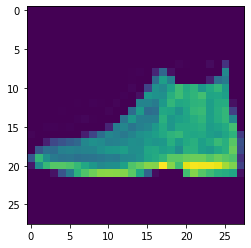

In [27]:
plt.imshow(xtest1[0].reshape(28,28))

In [28]:
ytest[9]

7

In [29]:
ytest

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [30]:
ypredd = np.array([labels.get(str(i)) for i in ypredd])
ytestt = np.array([labels.get(str(i)) for i in ytest])

In [31]:
len(ypredd)

10000

In [32]:
len(ytestt)

10000

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
import seaborn as sns

<AxesSubplot:>

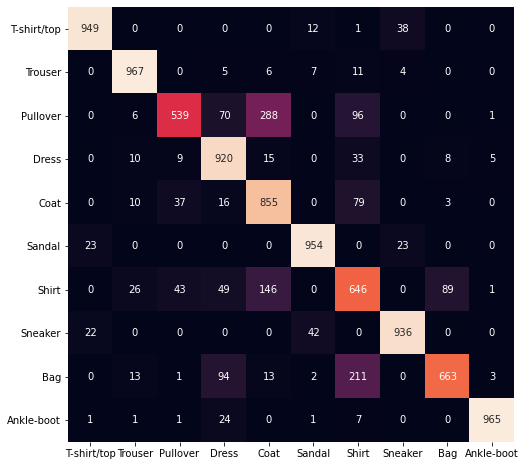

In [35]:

plt.figure(figsize=(8,8))
sns.heatmap(pd.DataFrame(confusion_matrix(ytestt,ypredd),index=labels.values(), columns=labels.values()),annot=True,fmt='d',cbar=False)

In [36]:
print(classification_report(ytestt,ypredd))

              precision    recall  f1-score   support

  Ankle-boot       0.95      0.95      0.95      1000
         Bag       0.94      0.97      0.95      1000
        Coat       0.86      0.54      0.66      1000
       Dress       0.78      0.92      0.84      1000
    Pullover       0.65      0.85      0.74      1000
      Sandal       0.94      0.95      0.95      1000
       Shirt       0.60      0.65      0.62      1000
     Sneaker       0.94      0.94      0.94      1000
 T-shirt/top       0.87      0.66      0.75      1000
     Trouser       0.99      0.96      0.98      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

